## Swwet list taxi - series numéricas

## 1. Preparar datos 

In [10]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#cargar datos en un dataframe
df_taxis = pd.read_csv('/Users/whitneyrios/PYTHON/My projects py/proyecto 13/Sweet-Lift-Taxi--Series-numericas/dataset/taxi.csv', parse_dates=[0], index_col=[0])

In [3]:
#visualizar los datos
df_taxis.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
#viendo la informacion general 
df_taxis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
#verificar valores ausentes 
df_taxis.isna().sum()

num_orders    0
dtype: int64

In [6]:
#verificando descripcion general de los datos
df_taxis.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [7]:
#ordenar el indice en orden cronologico
df_taxis = df_taxis.sort_index()

In [22]:
#remuestrar por una hora
data_taxis = df_taxis.resample('1h').sum()

In [18]:
#verificar el rango de fechas de la serie temporal
print(df_taxis.index.min())
print(df_taxis.index.max())

2018-03-01 00:00:00
2018-08-31 23:00:00


Contamos con datos desde el 1 de marzo hasta el 31 de agosto del 2018.

## 2. Análisis de los datos

In [23]:
#examinar la tendencia y estacionalidad de la serie temporal
decomposed = seasonal_decompose(data_taxis)

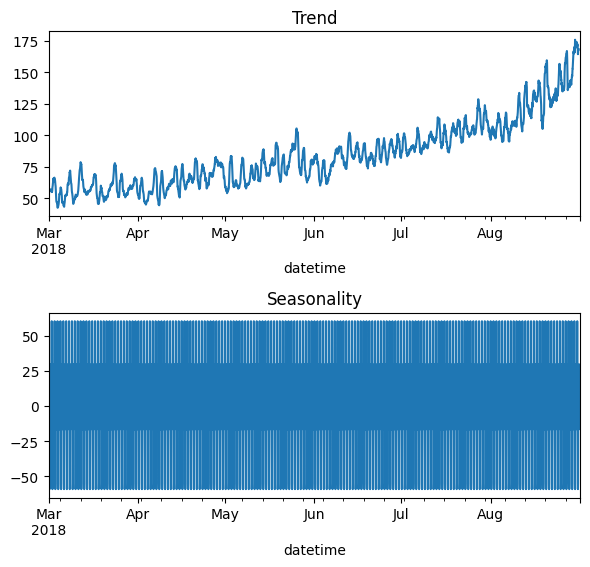

In [24]:
#graficar la tendencia y la estacionalidad de la serie temporal
plt.figure(figsize=(6,8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.tight_layout()

Mediante los gráficos, se aprecia una tendencia ascendente hacia el mes de agosto y se observa un proceso estacionario en la distribución de los datps.

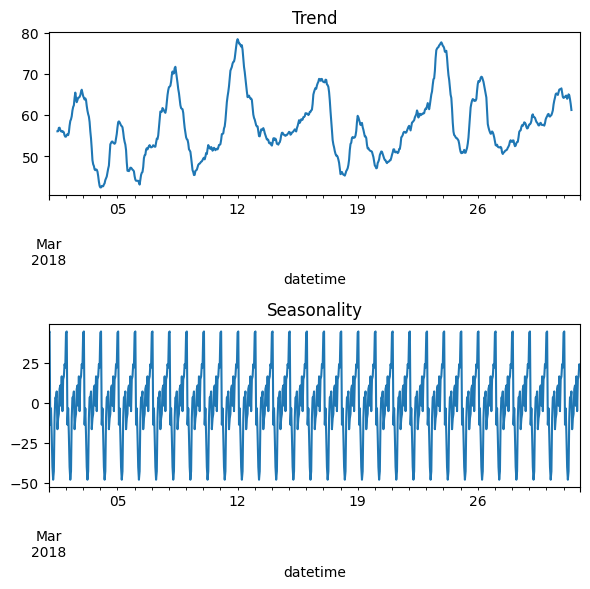

In [32]:
#examinar la tendencia y la distribucion en el mes de marzo y agosto
data_mar = df_taxis['2018-03-01':'2018-03-31'].resample('1h').sum()
data_mar_decomposed = seasonal_decompose(data_mar)

#graficar la tendencia y la estacionalidad de la serie temporal
plt.figure(figsize=(6,8))

plt.subplot(311)
data_mar_decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
data_mar_decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.tight_layout()
